In [3]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("GOOGL", start="2019-01-02", end="2020-04-30")[['Close']]
data.index = pd.to_datetime(data.index)
data.head().round(2)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-01-02,1054.68
2019-01-03,1025.47
2019-01-04,1078.07
2019-01-07,1075.92
2019-01-08,1085.37


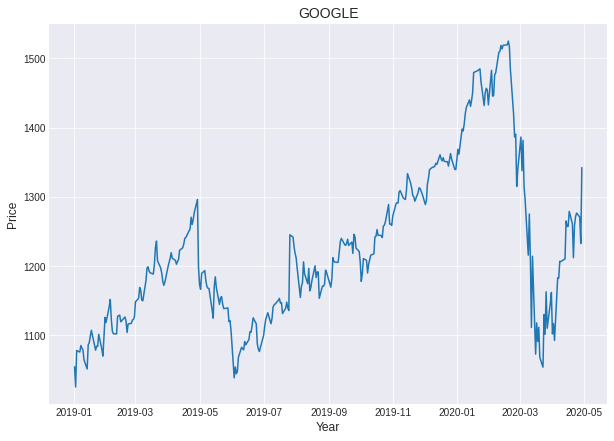

In [4]:
# Import matplotlib to plot the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot the time series
plt.figure(figsize=(10, 7))
plt.plot(data['Close'])
plt.title('GOOGLE', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

The series has the data at different levels showing different trends. Hence, it does not seem to be stationary.

In [ ]:
X = data.Close
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1149.725866, mean2=1297.573712
variance1=2985.418940, variance2=12150.977222


In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.31
5% Critical Value: -2.87
p-value: 0.17


The p-value is greater than 0.05. You fail to reject the null hypothesis and conclude that the time series is not stationary.

In [ ]:
# Import kpss
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.9649858466736184, 0.01, 17, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.96
5% Critical Value: 0.46
p-value: 0.01


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


the p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is not stationary. This is consistent with the result obtained with the ADF test.

<ipython-input-10-8251d047aa95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Difference'] = data['Close'].diff()


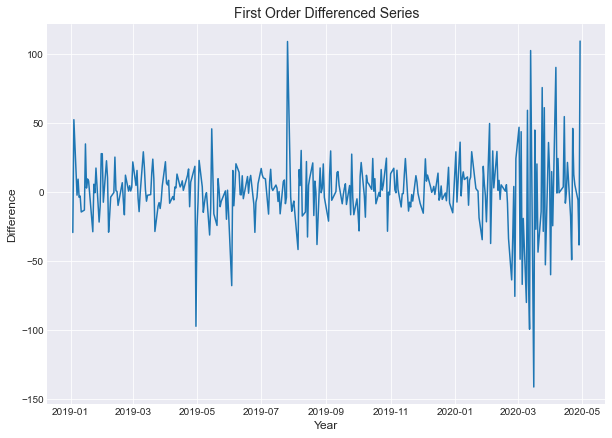

In [ ]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Difference'] = data['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [ ]:
result = adfuller(data.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-4.60392569946425, 0.00012703458433875917, 8, 324, {'1%': -3.450695263332383, '5%': -2.87050218926466, '10%': -2.5715449066453284}, 2892.9124794658223)
ADF Test Statistic: -4.60
5% Critical Value: -2.87
p-value: 0.00


The p-value is less than 0.05. You reject the null hypothesis and conclude that the time series is stationary.